### Importing libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [52]:
from sklearn import metrics
from sklearn.utils import resample
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import calibration_curve

In [3]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

### Loading datasets

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\Predictive maintenance 2

08-03-2021  13:01    <DIR>          .
08-03-2021  13:01    <DIR>          ..
08-03-2021  13:00    <DIR>          .ipynb_checkpoints
08-03-2021  13:01         6,859,936 Data Wrangling & EDA.ipynb
19-02-2021  17:36         2,228,855 PM_test.txt
19-02-2021  17:36         3,515,356 PM_train.txt
19-02-2021  17:36               429 PM_truth.txt
07-03-2021  18:19            76,214 test.csv
07-03-2021  18:19        15,496,716 train.csv
08-03-2021  13:01             2,863 Untitled.ipynb
               7 File(s)     28,180,369 bytes
               3 Dir(s)  167,481,630,720 bytes free


In [6]:
# load training data prepared previously

df_train = pd.read_csv('train.csv')
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.0600,9046.190000,1.3,47.470,521.660,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.0500,9045.130000,1.3,47.480,521.970,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.421300,0.0,0.233345,1.499066,1.796051,0.0,0.0,0.431335,0.014142,1.499066,0.0,0.014142,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.0600,9047.733333,1.3,47.410,522.120,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.395600,0.0,0.267644,1.918654,1.850009,0.0,0.0,0.327159,0.020000,4.632023,0.0,0.121655,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,518.67,642.167500,1588.075000,1402.452500,14.62,21.61,554.205000,2388.0725,9048.170000,1.3,47.340,522.305,2388.050,8134.292500,8.409325,0.03,391.500000,2388.0,100.0,38.972500,23.390175,0.0,0.250117,3.855909,1.559645,0.0,0.0,0.313103,0.029861,3.881555,0.0,0.171659,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,518.67,642.208000,1587.030000,1403.206000,14.62,21.61,554.164000,2388.0700,9049.566000,1.3,47.328,522.282,2388.048,8134.194000,8.413340,0.03,391.800000,2388.0,100.0,38.958000,23.393020,0.0,0.234776,4.075678,2.159440,0.0,0.0,0.286234,0.026458,4.587366,0.0,0.151063,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [7]:
# load testing data prepared previously

df_test = pd.read_csv('test.csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,2388.08,9056.40,1.3,47.23,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,518.67,642.266,1586.998,1399.918,14.62,21.61,554.116,2388.082,9050.324,1.3,47.288,521.924,2388.064,8132.032,8.42620,0.03,392.0,2388.0,100.0,38.924,23.37350,0.0,0.393865,4.683863,1.362689,0.0,0.0,0.338275,0.008367,5.200801,0.0,0.152217,0.261591,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,2388.10,9044.77,1.3,47.67,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,518.67,642.672,1588.342,1406.778,14.62,21.61,553.748,2388.108,9047.032,1.3,47.506,521.596,2388.102,8127.672,8.44226,0.03,392.2,2388.0,100.0,38.902,23.27434,0.0,0.167839,1.559670,4.535578,0.0,0.0,0.357729,0.044385,3.044901,0.0,0.098387,0.450255,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,2388.16,9049.26,1.3,47.88,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,518.67,642.874,1592.640,1413.350,14.62,21.61,552.702,2388.166,9047.406,1.3,47.706,520.722,2388.174,8129.666,8.45868,0.03,394.2,2388.0,100.0,38.686,23.24412,0.0,0.287367,4.205152,3.357976,0.0,0.0,0.292609,0.028810,1.608782,0.0,0.111937,0.418234,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,2388.13,9051.30,1.3,47.65,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,518.67,642.786,1591.918,1410.736,14.62,21.61,553.444,2388.116,9054.800,1.3,47.642,521.434,2388.114,8134.328,8.45182,0.03,393.6,2388.0,100.0,38.758,23.25156,0.0,0.106442,2.818611,5.282105,0.0,0.0,0.590999,0.058138,4.536805,0.0,0.046583,0.363291,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,2388.10,9053.99,1.3,47.46,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,518.67,642.702,1591.568,1411.796,14.62,21.61,553.158,2388.122,9053.330,1.3,47.536,521.062,2388.134,8128.798,8.43662,0.03,393.4,2388.0,100.0,38.810,23.29114,0.0,0.259557,1.496620,5.309739,0.0,0.0,0.454170,0.038987,3.212717,0.0,0.159154,0.260231,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


Create training and test data labels series.

Create features sets required to subset the original dataframes into original features and original + extracted features

In [8]:
# original features
features_orig = ['setting1','setting2','setting3',
                 's1','s2','s3','s4','s5','s6','s7','s8','s9','s10',
                 's11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_extr = ['setting1','setting2','setting3',
                 's1','s2','s3','s4','s5','s6','s7','s8','s9','s10',
                 's11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21',
                 'av1','av2','av3','av4','av5','av6','av7','av8','av9','av10',
                 'av11','av12','av13','av14','av15','av16','av17','av18','av19','av20','av21',
                 'sd1','sd2','sd3','sd4','sd5','sd6','sd7','sd8','sd9','sd10',
                 'sd11','sd12','sd13','sd14','sd15','sd16','sd17','sd18','sd19','sd20','sd21']

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']

In [9]:
X_train = df_train[features_orig]
X_test = df_test[features_orig] 

In [14]:
from lazypredict.Supervised import LazyRegressor

In [15]:
lreg = LazyRegressor()
models, predictions = lreg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [30:00<00:00, 41.88s/it]


,R-Squared,RMSE,Time Taken
Model,,,
MLPRegressor,0.69,0.24,8.61
ExtraTreesRegressor,0.69,0.24,4.33
NuSVR,0.66,0.25,601.35
GradientBoostingRegressor,0.65,0.26,7.99
RandomForestRegressor,0.65,0.26,15.71
SVR,0.64,0.26,6.08
BaggingRegressor,0.64,0.26,1.59
HistGradientBoostingRegressor,0.63,0.26,1.49
LGBMRegressor,0.62,0.27,0.52


In [11]:
# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
print('Training Score: ', model_rf.score(X_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(X_test, y_test)*100, '%')

Training Score:  100.0 %
Testing Score:  91.0 %


In [17]:
# Hyper-Parameter Optimization using GridSearchCV
# %%notify
np.random.seed(42)
start = time.time()

param_dist = {'n_estimators': [10, 20, 30, 40, 50, 60, 80, 100],
              'max_depth': [2, 4, 6, 8, 12, 10, 20],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid = param_dist,
                     n_jobs=-1,
                     scoring='roc_auc')

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 12, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 80, 100]},
             scoring='roc_auc')

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
Time taken in grid search:  9716.57


In [18]:
cv_rf.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=8,
                       random_state=42)

In [19]:
model_rf.set_params(bootstrap=False, 
                    criterion='entropy', 
                    max_depth=8,
                    max_features='auto',
                    n_estimators=100, 
                    random_state=42)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=8,
                       random_state=42)

In [20]:
# Retraining the model
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=8,
                       random_state=42)

In [37]:
pred = model_rf.predict(X_test)
prob = model_rf.predict_proba(X_test)
prob = prob[:, 1]
print('Classification report: \n', classification_report(pred, y_test))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        81
           1       0.72      0.95      0.82        19

    accuracy                           0.92       100
   macro avg       0.85      0.93      0.88       100
weighted avg       0.94      0.92      0.92       100



In [39]:
print('Accuracy: ', metrics.accuracy_score(y_test, pred))
print('Precision: ', metrics.precision_score(y_test, pred))
print('Recall: ', metrics.recall_score(y_test, pred))
print('F1 Score: ', metrics.f1_score(y_test, pred))
print('ROC AUC: ', metrics.roc_auc_score(y_test, prob))

Accuracy:  0.92
Precision:  0.9473684210526315
Recall:  0.72
F1 Score:  0.8181818181818181
ROC AUC:  0.9791999999999998


### Binary Classifcation:

Let us add some helper fuctions.

In [25]:
def bin_classify(model, clf, features, params=None, score=None):
    
    """Prefer Grid Search hyper parameter tuning on a classifier.
    
    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score
        
    Returns:
        Tuned Clssifier object
        dataframe of model predictions and scores
    
    """
    
    X_train = df_train[features]
    X_test = df_test[features] 
    
    grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred
        
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return grid_search.best_estimator_, df_predictions

In [31]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):
    
    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold
        
    """
      
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  

    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []  
    for thr in thresh_roc:  
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75
    
    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []  
    for thr in thresh_prc:  
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR') 
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines') 
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh

Using the above functions let us model and evaluate some binary classification algorithms.

__In model names:__  

__B__ stands for applying the model on the original features set, __B__efore feature extraction  
__A__ stands for applying the model on the original + extracted features set, __A__fter feature extraction


Best Parameters:
 LogisticRegression(C=10, random_state=123)
-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[73  2]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        75
           1       0.88      0.60      0.71        25

    accuracy                           0.88       100
   macro avg       0.88      0.79      0.82       100
weighted avg       0.88      0.88      0.87       100


Metrics:
           Logistic Regression B
Accuracy                0.880000
Precision               0.882353
Recall                  0.600000
F1 Score                0.714286
ROC AUC                 0.982400

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.992781   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.992781   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.828797  12  13  7

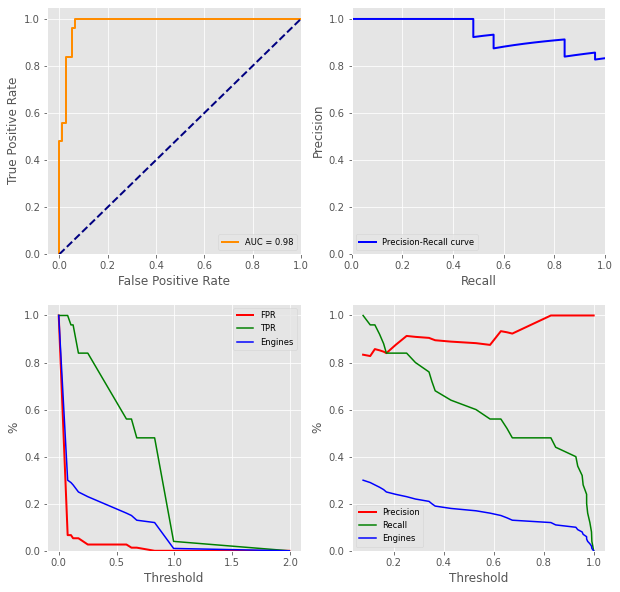

In [32]:
model = 'Logistic Regression B'
clf_lgrb = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgrb)

metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, pred_lgrb.y_score, print_out=True, plot_out=True)

##### Engines in the above charts represent the queue or number of engines to be maintain per period, i.e. maintenance capacity.


Best Parameters:
 LogisticRegression(C=10, random_state=123)
-----------------------------------------------------------
Logistic Regression A 

Confusion Matrix:
[[75  0]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       1.00      0.68      0.81        25

    accuracy                           0.92       100
   macro avg       0.95      0.84      0.88       100
weighted avg       0.93      0.92      0.91       100


Metrics:
           Logistic Regression A
Accuracy                0.920000
Precision               1.000000
Recall                  0.680000
F1 Score                0.809524
ROC AUC                 0.981867

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.994082   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.994082   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.619417  17   8  7

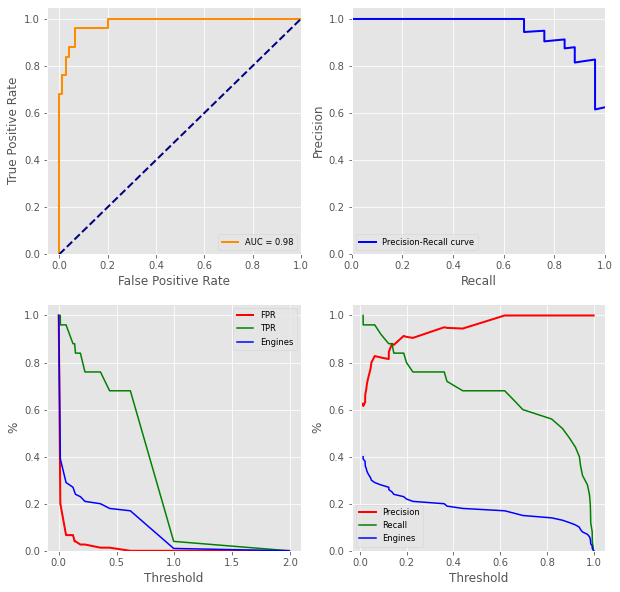

In [33]:
model = 'Logistic Regression A'
clf_lgra = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgra, pred_lgra = bin_classify(model, clf_lgra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgra)

metrics_lgra, roc_lgra, prc_lgra = bin_class_metrics(model, y_test, pred_lgra.y_pred, pred_lgra.y_score, print_out=True, plot_out=True)

In [34]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

,Logistic Regression B,Logistic Regression A
Accuracy,0.880000,0.920000
Precision,0.882353,1.000000
Recall,0.600000,0.680000
F1 Score,0.714286,0.809524
ROC AUC,0.982400,0.981867



Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)
-----------------------------------------------------------
Decision Tree B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           Decision Tree B
Accuracy          0.880000
Precision         0.933333
Recall            0.560000
F1 Score          0.700000
ROC AUC           0.945067

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   7  18  75   0  0.28  0.000000  1.000000  0.806452  0.07
2    0.938119   9  16  75   0  0.3

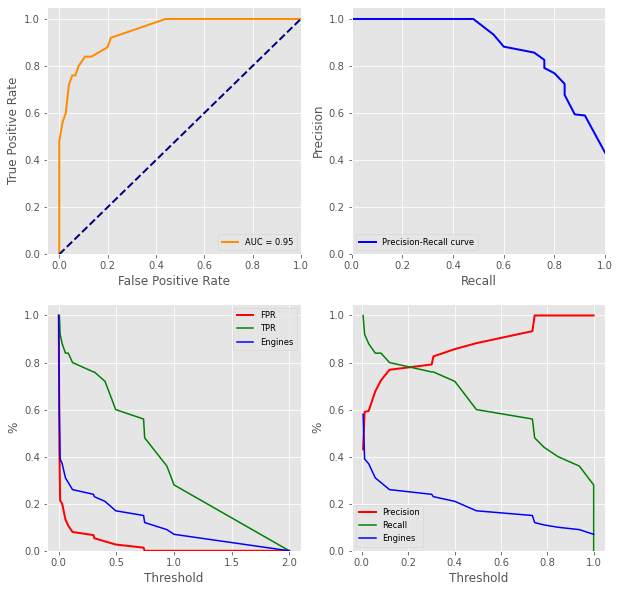

In [35]:
model = 'Decision Tree B'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, pred_dtrb = bin_classify(model, clf_dtrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtrb)

metrics_dtrb, roc_dtrb, prc_dtrb = bin_class_metrics(model, y_test, pred_dtrb.y_pred, pred_dtrb.y_score, print_out=True, plot_out=True)


Best Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
-----------------------------------------------------------
Decision Tree A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
           Decision Tree A
Accuracy          0.920000
Precision         0.947368
Recall            0.720000
F1 Score          0.818182
ROC AUC           0.962933

ROC Thresholds:

   Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000  10  15  75   0  0.40  0.000000  1.000000  0.833333  0.10
2   0.921053  11  14  75   0  0.44  0

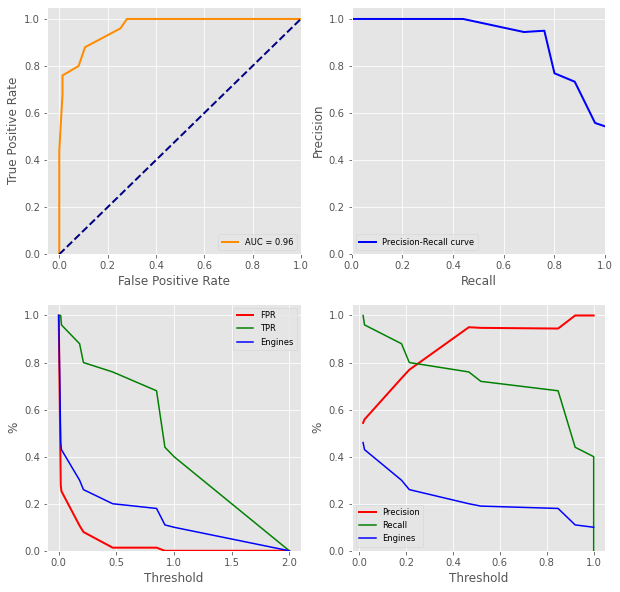

In [40]:
model = 'Decision Tree A'
clf_dtra = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtra, pred_dtra = bin_classify(model, clf_dtra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtra)

metrics_dtra, roc_dtra, prc_dtra = bin_class_metrics(model, y_test, pred_dtra.y_pred, pred_dtra.y_score, print_out=True, plot_out=True)

In [41]:
metrics_dtr = pd.concat([metrics_dtrb, metrics_dtra], axis=1)
metrics_dtr

,Decision Tree B,Decision Tree A
Accuracy,0.880000,0.920000
Precision,0.933333,0.947368
Recall,0.560000,0.720000
F1 Score,0.700000,0.818182
ROC AUC,0.945067,0.962933



Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest B
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.980267

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.997997   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.997997   1  24  75   0  0.04  0.000000  1.000000  0.757576 

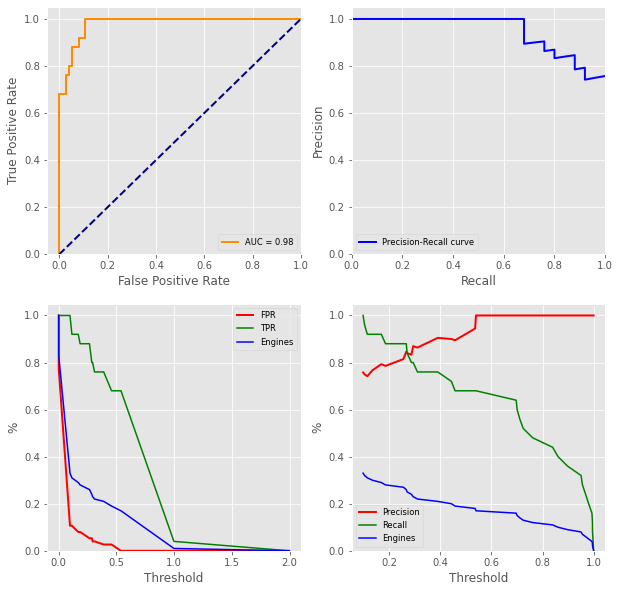

In [42]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, pred_rfcb.y_score, print_out=True, plot_out=True)


Best Parameters:
 RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=50,
                       random_state=123)
-----------------------------------------------------------
Random Forest A 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest A
Accuracy          0.910000
Precision         0.944444
Recall            0.680000
F1 Score          0.790698
ROC AUC           0.982400

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.999685   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.999685   1  24  75   0  0.04  0.000000  1.000000  0.757576 

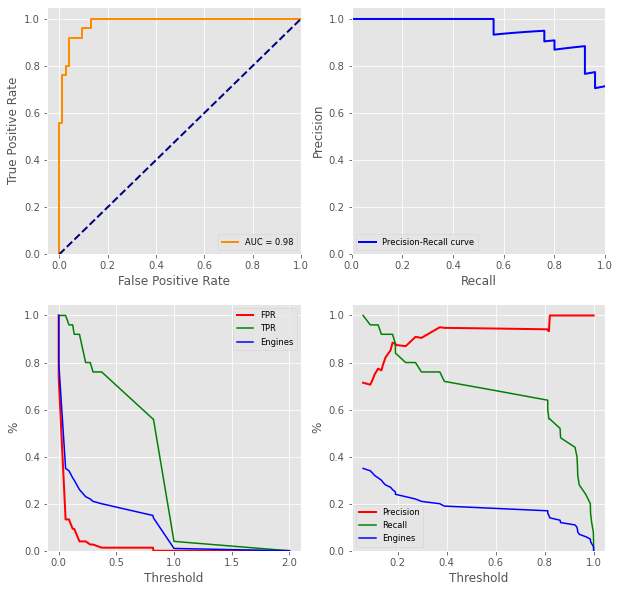

In [43]:
model = 'Random Forest A'
clf_rfca = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfca, pred_rfca = bin_classify(model, clf_rfca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfca)

metrics_rfca, roc_rfca, prc_rfca = bin_class_metrics(model, y_test, pred_rfca.y_pred, pred_rfca.y_score, print_out=True, plot_out=True)

In [44]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

,Random Forest B,Random Forest A
Accuracy,0.910000,0.910000
Precision,0.944444,0.944444
Recall,0.680000,0.680000
F1 Score,0.790698,0.790698
ROC AUC,0.980267,0.982400



Best Parameters:
 SVC(random_state=123)
-----------------------------------------------------------
SVC B 

Confusion Matrix:
[[75  0]
 [25  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        75
           1       0.00      0.00      0.00        25

    accuracy                           0.75       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.56      0.75      0.64       100


Metrics:
            SVC B
Accuracy   0.7500
Precision  0.0000
Recall     0.0000
F1 Score   0.0000
ROC AUC    0.8096

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    0.050578   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   -0.949422   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2   -0.983131   9  16  75   0  0.36  0.000000  1.000000  0.824176  0.09
3   -0.985559   9  16  73   2  0.36  0.026667  0.973333  0.820225  0.11
4   -0.

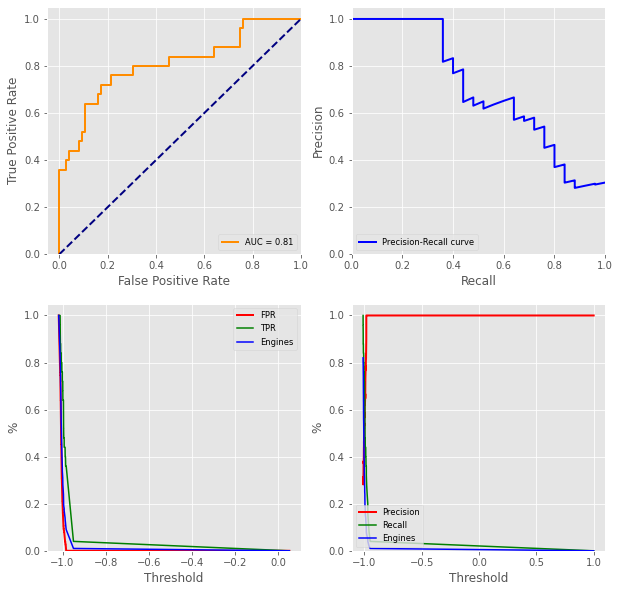

In [45]:
model = 'SVC B'
clf_svcb = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svcb, pred_svcb = bin_classify(model, clf_svcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svcb)

metrics_svcb, roc_svcb, prc_svcb = bin_class_metrics(model, y_test, pred_svcb.y_pred, pred_svcb.y_score, print_out=True, plot_out=True)


Best Parameters:
 SVC(random_state=123)
-----------------------------------------------------------
SVC A 

Confusion Matrix:
[[75  0]
 [25  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        75
           1       0.00      0.00      0.00        25

    accuracy                           0.75       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.56      0.75      0.64       100


Metrics:
            SVC A
Accuracy   0.7500
Precision  0.0000
Recall     0.0000
F1 Score   0.0000
ROC AUC    0.8272

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    0.043858   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   -0.956142   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2   -0.984095   9  16  75   0  0.36  0.000000  1.000000  0.824176  0.09
3   -0.985887   9  16  73   2  0.36  0.026667  0.973333  0.820225  0.11
4   -0.

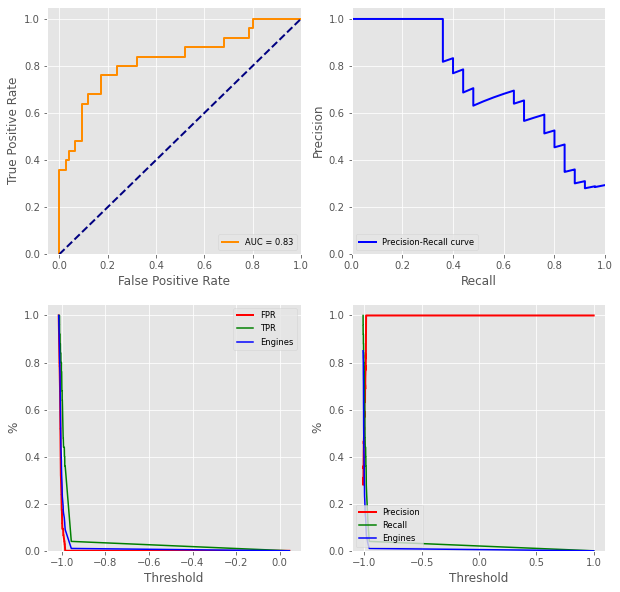

In [46]:
model = 'SVC A'
clf_svca = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svca, pred_svca = bin_classify(model, clf_svca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svca)

metrics_svca, roc_svca, prc_svca = bin_class_metrics(model, y_test, pred_svca.y_pred, pred_svca.y_score, print_out=True, plot_out=True)

In [47]:
# Compare SVC Before and After FE
metrics_svc = pd.concat([metrics_svcb, metrics_svca], axis=1)
metrics_svc.sort_index()

,SVC B,SVC A
Accuracy,0.7500,0.7500
F1 Score,0.0000,0.0000
Precision,0.0000,0.0000
ROC AUC,0.8096,0.8272
Recall,0.0000,0.0000



Best Parameters:
 LinearSVC(random_state=123)
-----------------------------------------------------------
SVC Linear B 

Confusion Matrix:
[[75  0]
 [23  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        75
           1       1.00      0.08      0.15        25

    accuracy                           0.77       100
   macro avg       0.88      0.54      0.51       100
weighted avg       0.82      0.77      0.69       100


Metrics:
           SVC Linear B
Accuracy       0.770000
Precision      1.000000
Recall         0.080000
F1 Score       0.148148
ROC AUC        0.971733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.289554   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.289554   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2   -0.566558  11  14  75   0  0.44  0.000000  1.000000  0.842697  0.11
3   -0.588142  11  14  74   1 

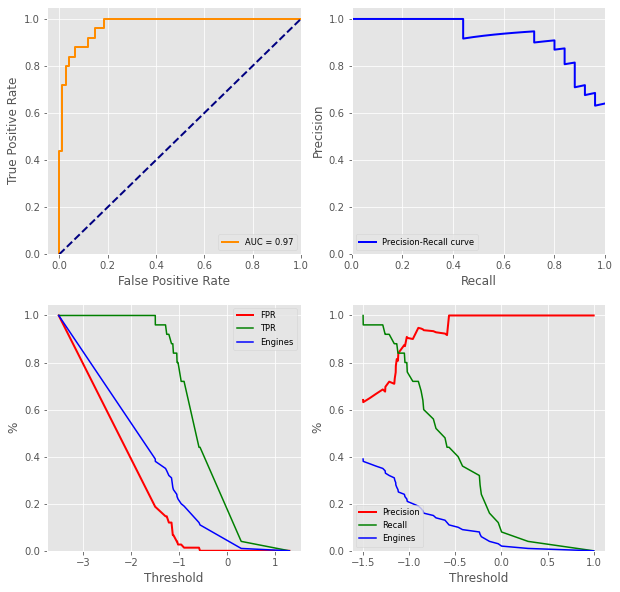

In [48]:
model = 'SVC Linear B'
clf_svlb = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svlb, pred_svlb = bin_classify(model, clf_svlb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svlb)

metrics_svlb, roc_svlb, prc_svlb = bin_class_metrics(model, y_test, pred_svlb.y_pred, pred_svlb.y_score, print_out=True, plot_out=True)


Best Parameters:
 LinearSVC(C=0.001, random_state=123)
-----------------------------------------------------------
SVC Linear A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
           SVC Linear A
Accuracy       0.920000
Precision      0.947368
Recall         0.720000
F1 Score       0.818182
ROC AUC        0.979733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.950379   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    0.950379   1  24  75   0  0.04  0.000000  1.000000  0.757576  0.01
2    0.262742  13  12  75   0  0.52  0.000000  1.000000  0.862069  0.13
3    0.204469  13  12

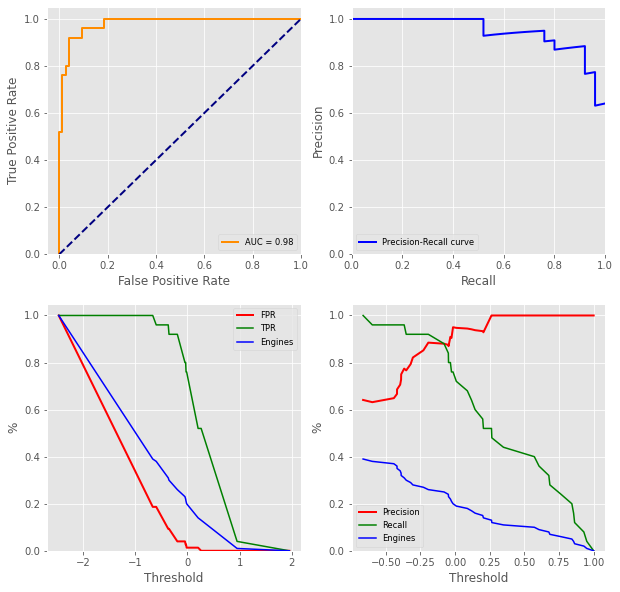

In [49]:
model = 'SVC Linear A'
clf_svla = LinearSVC(random_state=123)
gs_params = {'C': [.001, .01 ,.1 ]}
gs_score = 'roc_auc'

clf_svla, pred_svla = bin_classify(model, clf_svla, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svla)

metrics_svla, roc_svla, prc_svla = bin_class_metrics(model, y_test, pred_svla.y_pred, pred_svla.y_score, print_out=True, plot_out=True)

In [50]:
# Compare Linear SVC Before and After FE
metrics_svl = pd.concat([metrics_svlb, metrics_svla], axis=1)
metrics_svl.sort_index()

,SVC Linear B,SVC Linear A
Accuracy,0.770000,0.920000
F1 Score,0.148148,0.818182
Precision,1.000000,0.947368
ROC AUC,0.971733,0.979733
Recall,0.080000,0.720000



Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              KNN B
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.935200

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   5  20  75   0  0.20  0.000000  1.000000  0.789474  0.05
2    0.923077  10  15  75   0  0.40  0.000000  1.000000  0.833333  0.10
3    0.846154  12  13  75   0  0.48  0.00

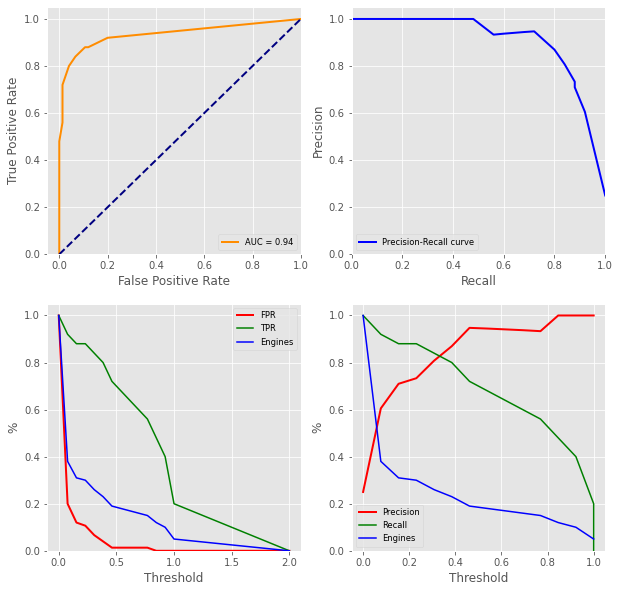

In [53]:
model = 'KNN B'
clf_knnb = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knnb, pred_knnb = bin_classify(model, clf_knnb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knnb)

metrics_knnb, roc_knnb, prc_knnb = bin_class_metrics(model, y_test, pred_knnb.y_pred, pred_knnb.y_score, print_out=True, plot_out=True)


Best Parameters:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
-----------------------------------------------------------
KNN A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
              KNN A
Accuracy   0.920000
Precision  0.947368
Recall     0.720000
F1 Score   0.818182
ROC AUC    0.963467

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2    0.923077  12  13  75   0  0.48  0.000000  1.000000  0.852273  0.12
3    0.846154  14  10  75   0  0.56  0.00

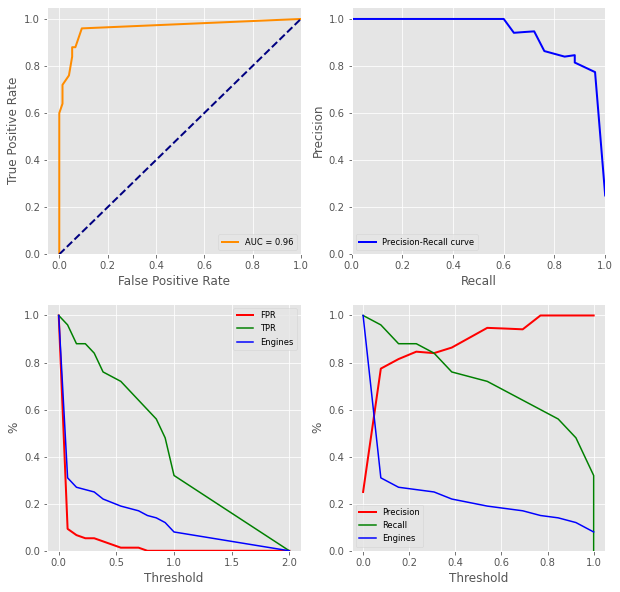

In [54]:
model = 'KNN A'
clf_knna = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9 , 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knna, pred_knna = bin_classify(model, clf_knna, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knna)

metrics_knna, roc_knna, prc_knna = bin_class_metrics(model, y_test, pred_knna.y_pred, pred_knna.y_score, print_out=True, plot_out=True)

In [55]:
# Compare KNN Before and After FE
metrics_knn = pd.concat([metrics_knnb, metrics_knna], axis=1)
metrics_knn.sort_index()

,KNN B,KNN A
Accuracy,0.910000,0.920000
F1 Score,0.790698,0.818182
Precision,0.944444,0.947368
ROC AUC,0.935200,0.963467
Recall,0.680000,0.720000



Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB B 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB B
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.987733

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2   1.000000e+00  17   8  75   0  0.68  0.000000  1.000000  0.903614  0.17
3   1.000000e+00  17   8  

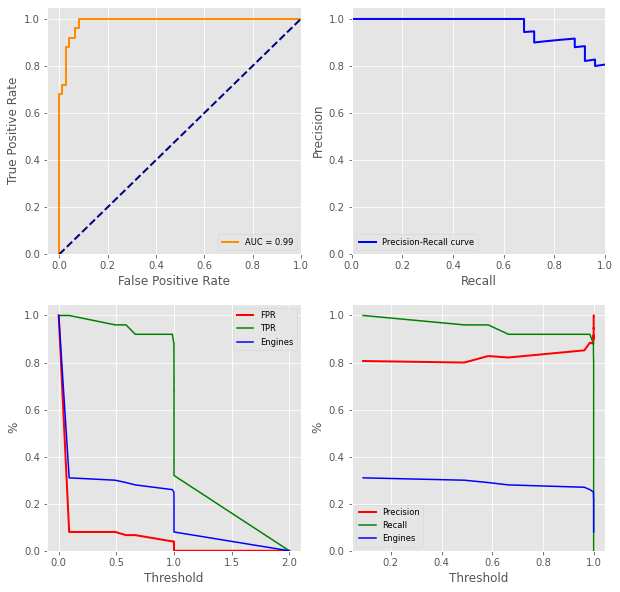

In [56]:
model = 'Gaussian NB B'
clf_gnbb = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)

metrics_gnbb, roc_gnbb, prc_gnbb = bin_class_metrics(model, y_test, pred_gnbb.y_pred, pred_gnbb.y_score, print_out=True, plot_out=True)


Best Parameters:
 GaussianNB()
-----------------------------------------------------------
Gaussian NB A 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB A
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.980533

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00  17   8  74   1  0.68  0.013333  0.986667  0.902439  0.18
2   1.000000e+00  20   5  74   1  0.80  0.013333  0.986667  0.936709  0.21
3   9.999630e-01  20   5  

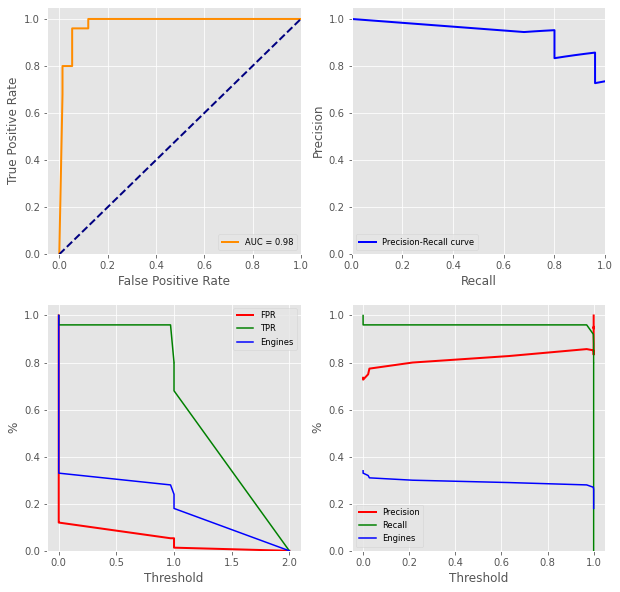

In [57]:
model = 'Gaussian NB A'
clf_gnba = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnba, pred_gnba = bin_classify(model, clf_gnba, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnba)

metrics_gnba, roc_gnba, prc_gnba = bin_class_metrics(model, y_test, pred_gnba.y_pred, pred_gnba.y_score, print_out=True, plot_out=True)

In [58]:
# Compare Naive Bayes Before and After FE
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnba], axis=1)
metrics_gnb.sort_index()

,Gaussian NB B,Gaussian NB A
Accuracy,0.940000,0.940000
F1 Score,0.888889,0.888889
Precision,0.827586,0.827586
ROC AUC,0.987733,0.980533
Recall,0.960000,0.960000


#### Compare all binary classification algorithms tested

In [59]:
#compare all models
metrics_bn = pd.concat([metrics_lgr, metrics_dtr, metrics_rfc, metrics_svc, metrics_svl, metrics_knn, metrics_gnb], axis=1)
metrics_bn

,Logistic Regression B,Logistic Regression A,Decision Tree B,Decision Tree A,Random Forest B,Random Forest A,SVC B,SVC A,SVC Linear B,SVC Linear A,KNN B,KNN A,Gaussian NB B,Gaussian NB A
Accuracy,0.880000,0.920000,0.880000,0.920000,0.910000,0.910000,0.7500,0.7500,0.770000,0.920000,0.910000,0.920000,0.940000,0.940000
Precision,0.882353,1.000000,0.933333,0.947368,0.944444,0.944444,0.0000,0.0000,1.000000,0.947368,0.944444,0.947368,0.827586,0.827586
Recall,0.600000,0.680000,0.560000,0.720000,0.680000,0.680000,0.0000,0.0000,0.080000,0.720000,0.680000,0.720000,0.960000,0.960000
F1 Score,0.714286,0.809524,0.700000,0.818182,0.790698,0.790698,0.0000,0.0000,0.148148,0.818182,0.790698,0.818182,0.888889,0.888889
ROC AUC,0.982400,0.981867,0.945067,0.962933,0.980267,0.982400,0.8096,0.8272,0.971733,0.979733,0.935200,0.963467,0.987733,0.980533


Naïve Bayes and Random Forests scored best AUC ROC. It also noticed that feature extraction has improved most models performance metrics.

Let us compare the AUC ROC and Precision-Recall curves as well

(-0.05, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC ROC')

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Recall Curve')

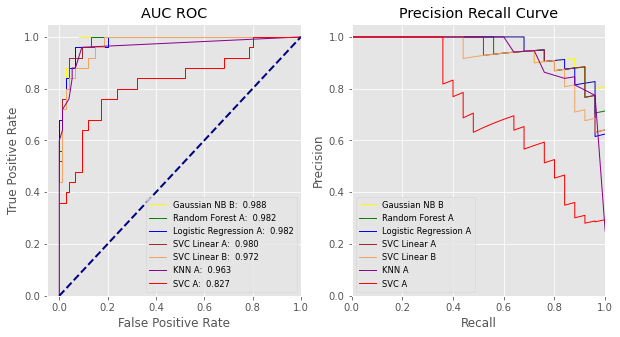

In [60]:
# Plot AUC-ROC and precision-recall curves for best models

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(10,5)

ax1.plot(roc_gnbb.FPR, roc_gnbb.TPR, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0] + ':  %.3f' % metrics_gnbb.at['ROC AUC', metrics_gnbb.columns.values.tolist()[0]])
ax1.plot(roc_rfca.FPR, roc_rfca.TPR, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0] + ':  %.3f' % metrics_rfca.at['ROC AUC', metrics_rfca.columns.values.tolist()[0]])
ax1.plot(roc_lgra.FPR, roc_lgra.TPR, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0] + ':  %.3f' % metrics_lgra.at['ROC AUC', metrics_lgra.columns.values.tolist()[0]])
ax1.plot(roc_svla.FPR, roc_svla.TPR, color='brown', lw=1, label= metrics_svla.columns.values.tolist()[0] + ':  %.3f' % metrics_svla.at['ROC AUC', metrics_svla.columns.values.tolist()[0]])
ax1.plot(roc_svlb.FPR, roc_svlb.TPR, color='sandybrown', lw=1, label= metrics_svlb.columns.values.tolist()[0] + ':  %.3f' % metrics_svlb.at['ROC AUC', metrics_svlb.columns.values.tolist()[0]])
ax1.plot(roc_knna.FPR, roc_knna.TPR, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0] + ':  %.3f' % metrics_knna.at['ROC AUC', metrics_knna.columns.values.tolist()[0]])
ax1.plot(roc_svca.FPR, roc_svca.TPR, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0] + ':  %.3f' % metrics_svca.at['ROC AUC', metrics_svca.columns.values.tolist()[0]])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right", fontsize='small')
ax1.set_title('AUC ROC')

ax2.plot(prc_gnbb.Recall, prc_gnbb.Precision, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0])
ax2.plot(prc_rfca.Recall, prc_rfca.Precision, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0])
ax2.plot(prc_lgra.Recall, prc_lgra.Precision, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0])
ax2.plot(prc_svla.Recall, prc_svla.Precision, color='brown', lw=1, label= metrics_svla.columns.values.tolist()[0])
ax2.plot(prc_svlb.Recall, prc_svlb.Precision, color='sandybrown', lw=1, label= metrics_svlb.columns.values.tolist()[0])
ax2.plot(prc_knna.Recall, prc_knna.Precision, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0])
ax2.plot(prc_svca.Recall, prc_svca.Precision, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left", fontsize='small')
ax2.set_title('Precision Recall Curve')

__Binary Classification Summary:__  

* Most of the binary classifiers showed better performance metrics with the addition of new features.  
* Random Forest and Naive Bayes showed same performance before and after feature engineering.  
* Naive Bayes and Linear SVC (with new features) scored better than other classifiers in Recall (Sensitivity) while others scored better in Precision. 
* Linear SVC has totally different scoring metrics before and after FE, switching between Precision and Recall !!  
* Although SVC (rbf) has the lowest AUC-ROC, it has the best precision-recall curve operating at threshold 0.17, giving  %100 precision and %68 recall, targeting %17 of the engines
* The graphs for TPR, FPR, and Engines should be linked to cost matrix of (TP, FP, TN, FN) to calculate the expected value at different operating points (thresholds) to help optimizing business decisions.

### Expected Value Calculation:

Based on the book: [Data Science for Business](https://www.amazon.com/Data-Science-Business-Data-Analytic-Thinking/dp/1449361323), Expected Value is a method to compare different classification models by constructing cost-benefit matrix in line with the confusion matrix, and then convert model performance to a single monetary value by multiplying confusion matrix into the cost-benefit matrix.  

#### _Expected Profit = Prop(+ve) x [TPR x benefit(TP) + FNR x cost(FN)] + Prob(-ve) x [TNR x benefit(TN) + FPR x cost(FP)] _

Cost-benefit matrix should be designed by domain expert. Let us assume the following:  

- True Positive (TP) has benefit of USD 300K:  engines that need maintenance and correctly selected by the model.  
- True Negative (TN) has benefit of USD 0K: engines that are OK and not selected by the model.
- False Positive (FP) has cost of USD -100K: engines that are OK but selected by the model.
- False Negative (FN) has cost of USD -200K: engines that need maintenance but not selected by the model.

No. of positive class instances in the test data = 25  
No. of negative class instances in the test data = 75

In [61]:
TPb = 300
TNb = 0
FPc = -100
FNc = -200

prob_positive = 0.25 
prop_negative = 0.75

In [62]:
# calculate the max profit in each model using roc dataframes generated earlier during model training

df_max_profit = pd.DataFrame()

roc_dfs = [roc_lgrb, roc_lgra, roc_dtrb, roc_dtra, roc_rfcb, roc_rfca, roc_svcb, roc_svca, roc_svlb, roc_svla, roc_knnb, roc_knna, roc_gnbb, roc_gnba]

for df in roc_dfs:
    df['Profit'] = prob_positive*(df.TPR*TPb + df.FNR*FNc) + prop_negative*(df.TNR*TNb + df.FPR*FPc)
    df_max = df[df.Profit == df.Profit.max()]
    df_max_profit = pd.concat([df_max_profit,df_max], ignore_index=True)
    
colnames = ['Profit', 'Model', 'Que', 'Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR', 'FNR']

# sort results by Profit
df_max_profit = df_max_profit[colnames].sort_values(by='Profit', ascending=False).reset_index(drop=True)
df_max_profit

,Profit,Model,Que,Threshold,TP,FP,TN,FN,TPR,FPR,TNR,FNR
0,20.000000,Logistic Regression B,0.30,0.077102,25,0,70,5,1.00,0.066667,0.933333,1.000000
1,19.000000,Gaussian NB B,0.31,0.090529,25,0,69,6,1.00,0.080000,0.920000,1.000000
2,18.694444,Gaussian NB A,0.28,0.969744,24,1,71,4,0.96,0.053333,0.946667,0.986111
3,17.704225,Logistic Regression A,0.29,0.063372,24,1,70,5,0.96,0.066667,0.933333,0.985915
4,17.351351,Random Forest A,0.26,0.179746,23,2,72,3,0.92,0.040000,0.960000,0.972973
5,17.351351,SVC Linear A,0.26,-0.192935,23,2,72,3,0.92,0.040000,0.960000,0.972973
6,17.000000,Random Forest B,0.33,0.097536,25,0,67,8,1.00,0.106667,0.893333,1.000000
7,15.724638,KNN A,0.31,0.076923,24,1,68,7,0.96,0.093333,0.906667,0.985507
8,13.054795,SVC Linear B,0.27,-1.132522,22,3,70,5,0.88,0.066667,0.933333,0.958904
9,10.702703,KNN B,0.26,0.307692,21,4,70,5,0.84,0.066667,0.933333,0.945946


Gaussian Naieve Bayes has the best profit per engine (USD 19K per engine) if the company has the capacity to maintain %31 of the engines per period (Queue).

For constrained business capacity, the same method could be applied:

In [63]:
# sort the results by Que (capacity) and Profit

df_max_profit = df_max_profit[colnames].sort_values(by=['Que', 'Profit'], ascending=[True, False]).reset_index(drop=True)
df_max_profit

,Profit,Model,Que,Threshold,TP,FP,TN,FN,TPR,FPR,TNR,FNR
0,17.351351,Random Forest A,0.26,0.179746,23,2,72,3,0.92,0.040000,0.960000,0.972973
1,17.351351,SVC Linear A,0.26,-0.192935,23,2,72,3,0.92,0.040000,0.960000,0.972973
2,10.702703,KNN B,0.26,0.307692,21,4,70,5,0.84,0.066667,0.933333,0.945946
3,13.054795,SVC Linear B,0.27,-1.132522,22,3,70,5,0.88,0.066667,0.933333,0.958904
4,18.694444,Gaussian NB A,0.28,0.969744,24,1,71,4,0.96,0.053333,0.946667,0.986111
5,17.704225,Logistic Regression A,0.29,0.063372,24,1,70,5,0.96,0.066667,0.933333,0.985915
6,7.816901,Decision Tree B,0.29,0.082857,21,4,67,8,0.84,0.106667,0.893333,0.943662
7,20.000000,Logistic Regression B,0.30,0.077102,25,0,70,5,1.00,0.066667,0.933333,1.000000
8,10.142857,Decision Tree A,0.30,0.180978,22,3,67,8,0.88,0.106667,0.893333,0.957143
9,19.000000,Gaussian NB B,0.31,0.090529,25,0,69,6,1.00,0.080000,0.920000,1.000000


For constrained operations:

- Working at capacity of %26: Best proft per engine is USD 17.35 (Random Forest A or SVC Linear A)
- Working at capacity of %28: Best profit per engine is USD 18.69 (Logistic Regression B or Gaussian NB A)

__Summary:__  

With the use of __Expected Value__ method to calculate business gain in monetary units, we were able to compare different classification models and support decision-making in different operating conditions.